In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cleaning the dataset

In [14]:
df = pd.read_csv("overall.csv")
del df["Unnamed: 0"]

df['year'] = df['term'].apply(lambda x: x[0:7])
df['term'] = df['term'].apply(lambda x: x[8:])
df["before_process_vacancy"].replace(0, np.nan, inplace = True)
df.dropna(inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132000 entries, 1 to 217811
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   term                    132000 non-null  object 
 1   session                 132000 non-null  object 
 2   bidding_window          132000 non-null  object 
 3   course_code             132000 non-null  object 
 4   description             132000 non-null  object 
 5   section                 132000 non-null  object 
 6   vacancy                 132000 non-null  int64  
 7   opening_vacancy         132000 non-null  int64  
 8   before_process_vacancy  132000 non-null  float64
 9   dice                    132000 non-null  int64  
 10  after_process_vacancy   132000 non-null  int64  
 11  enrolled_students       132000 non-null  int64  
 12  median_bid              132000 non-null  float64
 13  min_bid                 132000 non-null  float64
 14  instructor          

Filtering

In [16]:
#Taking a sample module to visualise the distribution of the labels

cor1305 = df[df['course_code'] == 'COR1305']

How are the bids distributed?

In [17]:
cor1305.describe()

,vacancy,opening_vacancy,before_process_vacancy,dice,after_process_vacancy,enrolled_students,median_bid,min_bid
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,45.017566,41.554580,7.176913,0.005019,3.115433,38.439147,20.271179,17.875546
std,1.166833,4.715642,8.862578,0.070710,3.946148,5.210675,22.318784,20.607999
min,42.000000,30.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,45.000000,40.000000,2.000000,0.000000,0.000000,35.000000,0.000000,0.000000
50%,45.000000,44.000000,4.000000,0.000000,1.000000,40.000000,12.750000,10.030000
75%,45.000000,45.000000,9.000000,0.000000,5.000000,42.000000,40.020000,35.100000
max,47.000000,45.000000,38.000000,1.000000,34.000000,45.000000,93.710000,93.710000


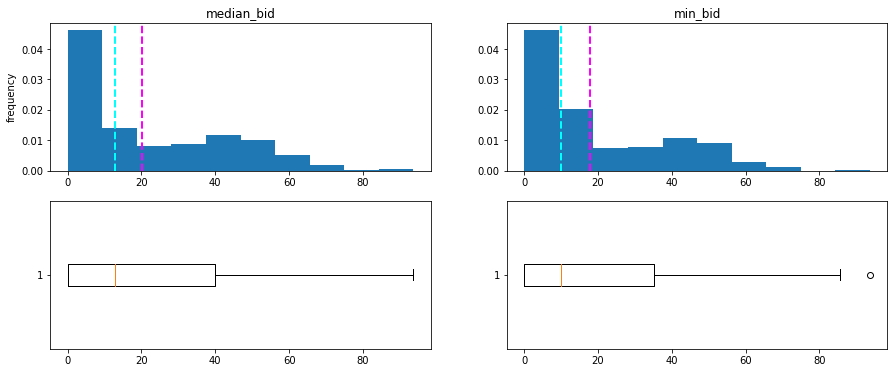

In [18]:
bids = ['median_bid', 'min_bid']

fig, ax = plt.subplots(2, 2, figsize = (15, 6))

for i in range(2):
    ax[0, i].hist(cor1305[bids[i]], density = True)
    ax[0, i].set_title(bids[i])
    ax[1, i].boxplot(cor1305[bids[i]], vert = False)
    ax[0, i].axvline(cor1305[bids[i]].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0, i].axvline(cor1305[bids[i]].median(), color='cyan', linestyle='dashed', linewidth=2)

ax[0, 0].set_ylabel('frequency')

plt.show()

Vacancies v. Median Bid Correlation: 26.20%
Vacancies v. Min Bid Correlation: 20.11%


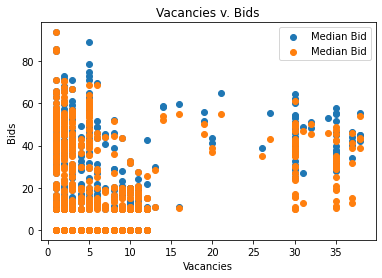

In [81]:
fig = plt.figure()
ax = fig.gca()
ax.scatter(cor1305['before_process_vacancy'], cor1305['median_bid'], label = 'Median Bid')
ax.scatter(cor1305['before_process_vacancy'], cor1305['min_bid'], label = 'Median Bid')
ax.set_xlabel('Vacancies')
ax.set_ylabel('Bids')
ax.set_title('Vacancies v. Bids')


ax.legend()

print("Vacancies v. Median Bid Correlation: {:.2%}".format(cor1305.before_process_vacancy.corr(cor1305.median_bid)))
print("Vacancies v. Min Bid Correlation: {:.2%}".format(cor1305.before_process_vacancy.corr(cor1305.min_bid)))

# Building a predictive model

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [87]:
X = df.iloc[:,[0, 1, 2, 3, 5, 8, 14, 15, 16]]
Y = df.iloc[:, [12, 13, 10]]


#preprocessing for numeric features

numeric_features = [5]
numeric_transformer = Pipeline(steps = [
    ('scalar', StandardScaler())
])

#preprocessing for categorical features
categorical_features = [0, 1, 2, 3, 4, 6, 7, 8]
categorical_transformer = Pipeline(steps = [
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split the data 70%-30% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 92400 rows
Test Set: 39600 rows


## Linear Regression w/o slope dummy variables

In [22]:
# Create preprocessing and training pipeline

model = Pipeline(steps = [('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

label = ['median_bid']

# fit the pipeline to train a linear regression model
model.fit(X_train, Y_train[[])

predictions = model.predict(X_test)

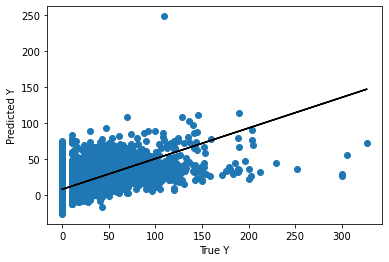

In [23]:
ax = plt.axes()
plt.scatter(x = Y_test['median_bid'], y = predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
z = np.polyfit(x = Y_test['median_bid'], y = predictions, deg = 1)
p = np.poly1d(z.flatten())
plt.plot(Y_test['median_bid'], p(Y_test['median_bid']), color = 'black')

plt.show()

In [65]:
print(" R2: {:.3f}\n RMSE = {:.3f}".format(r2_score(Y_test[[label]], predictions), mean_squared_error(Y_test[[label]], predictions)**0.5))

ValueError: y_true and y_pred have different number of output (1!=3)

## Decision Tree w/o Slope Dummies

In [25]:
# List of values to try for max_depth:

max_depth_range = list(range(1, 20))

# List to store the accuracy for each value of max_depth:

accuracy = []
for depth in max_depth_range:
    
    clf = Pipeline(steps = [('preprocessor', preprocessor),
                             ('regressor', tree.DecisionTreeRegressor(max_depth = depth, 
                             random_state = 0))])
    clf.fit(X_train, Y_train)
    score = clf.score(X_train, Y_train)
    accuracy.append(score)

i = accuracy.index(max(accuracy))

clf = Pipeline(steps = [('preprocessor', preprocessor),
                             ('regressor', tree.DecisionTreeRegressor(max_depth = i))])
clf = clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

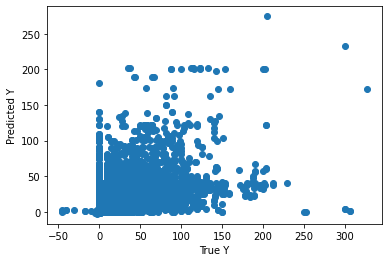

In [26]:
ax = plt.axes()
plt.scatter(Y_test, predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')

plt.show()

In [27]:
print(" R2: {:.3f}\n RMSE = {:.3f}".format(r2_score(Y_test, predictions), mean_squared_error(Y_test, predictions)**0.5))

 R2: 0.512
 RMSE = 12.301


## Random Forest w/o Slope Dummies

In [89]:
forest = Pipeline(steps = [(
    'preprocessor', preprocessor), (
    'regressor', RandomForestRegressor()
)])

forest.fit(X_train, Y_train)

predictions = forest.predict(X_test)

C:\Users\bhara\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


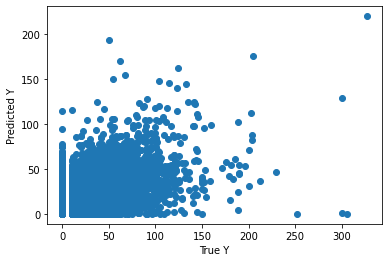

In [101]:
plt.scatter(Y_test[label], predictions)
plt.xlabel('True Y')
plt.ylabel('Predicted Y')
plt.show()

In [97]:
print(" R2: {:.3f}\n RMSE = {:.3f}".format(r2_score(Y_test[[label]], predictions), mean_squared_error(Y_test[[label]], predictions)**0.5))

 R2: 0.495
 RMSE = 13.996


In this segment, I try adding a dummy slope for the categorical variables to see if they improve the 3 models

## Linear Regression w Slope Dummies

In [38]:
X = df.iloc[:,[0, 1, 2, 3, 5, 8, 14, 15, 16]]
Y = df.iloc[:, [12, 13, 10]]


#preprocessing manually since pipelining doesn't work with column mutation

numeric_transformer = StandardScaler()
num = numeric_transformer.fit_transform(X.iloc[:, [5]])

#preprocessing for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
cat = categorical_transformer.fit_transform(X.iloc[:, [0, 1, 2, 3, 4, 6, 7, 8]]).toarray()

# Combining features
slope_dummy = np.array(cat * num)
X = np.concatenate([cat, num, slope_dummy], 1)

# Split the data 70%-30% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 92400 rows
Test Set: 39600 rows


In [29]:

model = LinearRegression()
label = 'median_bid'

# fit the linear regression model

model.fit(X_train, Y_train[label])

predictions = model.predict(X_test)

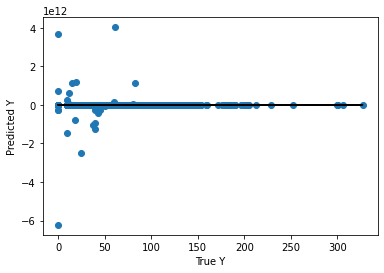

In [30]:
ax = plt.axes()
plt.scatter(x = Y_test[label], y = predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
z = np.polyfit(x = Y_test[label], y = predictions, deg = 1)
p = np.poly1d(z.flatten())
plt.plot(Y_test[label], p(Y_test[label]), color = 'black')

plt.show()

This model seems to generate extreme outliers among the predicted values. Let's filter those out

In [31]:
pred = pd.DataFrame(predictions, columns = ['col'])

filter = (pred['col'] >= 0) & (pred['col'] <= 150)
true_y = Y_test.reset_index()
true_y = true_y[[label]][filter]

pred = pred[filter]

Let's try plotting the graph again with the filtered values

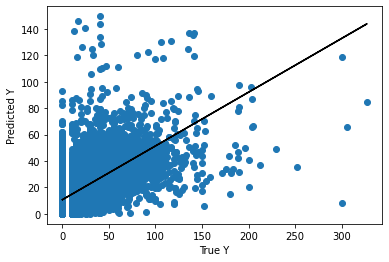

In [32]:
ax = plt.axes()
plt.scatter(x = true_y[label], y = pred)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')
z = np.polyfit(x = true_y[label], y = pred, deg = 1)
p = np.poly1d(z.flatten())
plt.plot(true_y[label], p(true_y[label]), color = 'black')

plt.show()

In [33]:
print(" R2: {:.3f}\n RMSE = {:.3f}".format(r2_score(true_y[[label]], pred), mean_squared_error(true_y[[label]], pred)**0.5))

 R2: 0.412
 RMSE = 15.649


## Decision Tree w the Dummy Slopes

In [39]:
# Identifying max_depth is infeasible at least on my local desktop

# max_depth_range = list(range(1, 20))

# accuracy = []
# for depth in max_depth_range:
    
#     clf = tree.DecisionTreeRegressor(max_depth = depth, random_state = 0)

#     clf.fit(X_train, Y_train)
#     score = clf.score(X_train, Y_train)
#     accuracy.append(score)

# i = accuracy.index(max(accuracy))

clf = tree.DecisionTreeRegressor(random_state = 0)

clf = clf.fit(X_train, Y_train)

predictions = clf.predict(X_test)

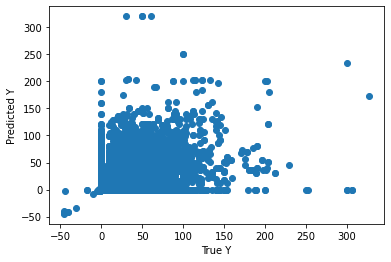

In [40]:
ax = plt.axes()
plt.scatter(Y_test, predictions)
ax.set_xlabel('True Y')
ax.set_ylabel('Predicted Y')

plt.show()

In [41]:
print(" R2: {:.3f}\n RMSE = {:.3f}".format(r2_score(Y_test, predictions), mean_squared_error(Y_test, predictions)**0.5))

 R2: 0.382
 RMSE = 13.949
